In [1]:
import pandas as pd
import numpy as np

import scipy as sp
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  

### The Challenge:

Given that we are so close to CA wine country we’re interested in understanding what makes a wine 'good'. To answer this question, we have obtained the attached dataset with a collection of descriptive and physicochemical characteristics of more than 6000 different wines along with a 'quality rating'. The quality rating represents the median score from three wine experts from 0-10 where 0 is terrible and 10 is excellent. Please use any method(s) you find appropriate to help us understand what makes a wine ‘good’. Any code must be in an open source language. This assignment must be completed individually.

In [2]:
# Read in csv
df = pd.read_csv('SAPio_DataScience_Challenge.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,astringency rating,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,vintage,quality
0,red,7.4,0.70,0.00,0.81,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2001.0,5
1,red,7.8,NaN,0.00,0.86,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2003.0,5
2,red,7.8,0.76,0.04,0.85,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2006.0,5
3,red,11.2,0.28,0.56,1.14,NaN,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2003.0,6
4,red,7.4,0.70,0.00,0.81,NaN,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2004.0,5


In [4]:
# What does the data structure look like?
df.shape

(6497, 15)

In [5]:
# Examine summary statistics of each column to look for any odd behavior
df.describe()

,fixed acidity,volatile acidity,citric acid,astringency rating,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,vintage,quality
count,6497.000000,6198.000000,6497.000000,6165.000000,4133.000000,6497.000000,6497.000000,6497.000000,6497.000000,6435.000000,6497.000000,6497.000000,6428.000000,6497.000000
mean,7.215307,0.339087,0.318633,0.751004,5.459098,0.056034,30.525319,115.744574,0.994697,3.218407,0.531268,10.491801,2005.494866,5.818378
std,1.296434,0.163832,0.145318,0.134546,4.832146,0.035034,17.749400,56.521855,0.002999,0.160600,0.148806,1.192712,1.723759,0.873255
min,3.800000,0.080000,0.000000,0.410000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,2001.000000,3.000000
25%,6.400000,0.230000,0.250000,0.670000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,2004.000000,5.000000
50%,7.000000,0.290000,0.310000,0.730000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,2005.000000,6.000000
75%,7.700000,0.400000,0.390000,0.800000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,2007.000000,6.000000
max,15.900000,1.580000,1.660000,1.620000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,2008.000000,9.000000


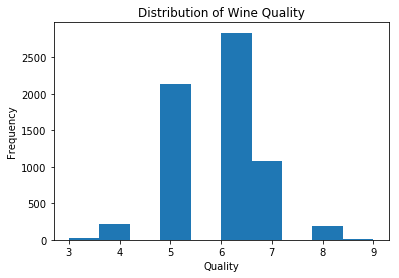

In [6]:
# What's the distribution of wine quality?

plt.figure()
plt.hist(df['quality'].values)


# Set the title and labels
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

plt.show()

In [7]:
# What are the average characteristics of a high-rated wine?
df[df['quality']==9].describe()

,fixed acidity,volatile acidity,citric acid,astringency rating,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,vintage,quality
count,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.0
mean,7.420000,0.298000,0.386000,0.766000,3.200000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.18000,2006.80000,9.0
std,0.983362,0.057619,0.082037,0.095026,1.414214,0.007436,13.427584,19.824228,0.003118,0.082885,0.092628,1.01341,1.30384,0.0
min,6.600000,0.240000,0.290000,0.690000,2.200000,0.018000,24.000000,85.000000,0.989650,3.200000,0.360000,10.40000,2005.00000,9.0
25%,6.900000,0.260000,0.340000,0.720000,2.700000,0.021000,27.000000,113.000000,0.989800,3.280000,0.420000,12.40000,2006.00000,9.0
50%,7.100000,0.270000,0.360000,0.730000,3.200000,0.031000,28.000000,119.000000,0.990300,3.280000,0.460000,12.50000,2007.00000,9.0
75%,7.400000,0.360000,0.450000,0.760000,3.700000,0.032000,31.000000,124.000000,0.990550,3.370000,0.480000,12.70000,2008.00000,9.0
max,9.100000,0.360000,0.490000,0.930000,4.200000,0.035000,57.000000,139.000000,0.997000,3.410000,0.610000,12.90000,2008.00000,9.0


In [8]:
# What are the average characteristics of a low-rated wine?
df[df['quality']==3].describe()

,fixed acidity,volatile acidity,citric acid,astringency rating,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,vintage,quality
count,30.000000,26.000000,30.00000,26.000000,20.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,7.853333,0.558654,0.28100,0.832692,4.120000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,2005.533333,3.0
std,1.747853,0.348903,0.17351,0.188139,3.916409,0.062014,59.990327,112.141762,0.002833,0.213246,0.126994,1.106497,1.814374,0.0
min,4.200000,0.170000,0.00000,0.440000,0.700000,0.022000,3.000000,9.000000,0.991100,2.870000,0.280000,8.000000,2003.000000,3.0
25%,6.800000,0.260000,0.21250,0.725000,1.537500,0.038750,5.250000,30.000000,0.993750,3.140000,0.407500,9.625000,2004.000000,3.0
50%,7.450000,0.485000,0.33000,0.810000,2.500000,0.055000,17.000000,102.500000,0.995900,3.245000,0.505000,10.150000,2005.500000,3.0
75%,8.575000,0.730000,0.39500,0.925000,4.725000,0.081000,37.375000,193.250000,0.998060,3.415000,0.565000,11.000000,2007.000000,3.0
max,11.800000,1.580000,0.66000,1.210000,15.100000,0.267000,289.000000,440.000000,1.000800,3.630000,0.860000,12.600000,2008.000000,3.0


### Preliminary Assumptions

Most frequent score is 6. What makes a wine have a score higher than 6?

Sulfur dioxide varies a lot.

Data looks clean.

### Exploratory Data Analysis

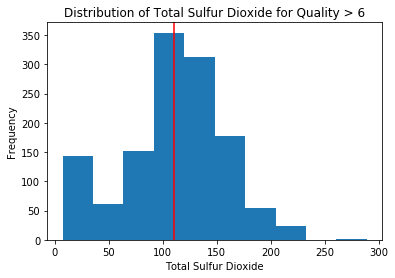

In [9]:
# Let's look at Sulfur dioxide's relationship to the rating since it has the highest standard deviation.

# Plat a histogram to see distribution

plt.figure()
x = df[df['quality']>6]['total sulfur dioxide'].values
plt.hist(x)


# Set the title and labels
plt.title('Distribution of Total Sulfur Dioxide for Quality > 6')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')
# Plot average line
plt.axvline(x=x.mean(), color='red')

plt.show()

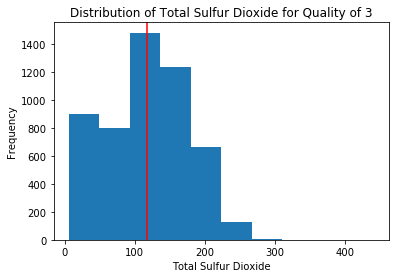

In [10]:
plt.figure()
x = df[df['quality']<7]['total sulfur dioxide'].values
plt.hist(x)


# Set the title and labels
plt.title('Distribution of Total Sulfur Dioxide for Quality of 3')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')
# Plot average line
plt.axvline(x=x.mean(), color='red')


plt.show()

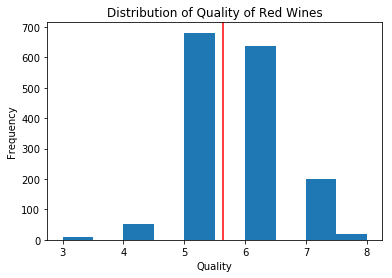

In [11]:
# Differences by wine color

# Red wine
plt.figure()
x=df[df['type']=='red']
plt.hist(x['quality'].values)


# Set the title and labels
plt.title('Distribution of Quality of Red Wines')
plt.xlabel('Quality')
plt.ylabel('Frequency')
# Plot average line
plt.axvline(x=x['quality'].values.mean(), color='red')

plt.show()

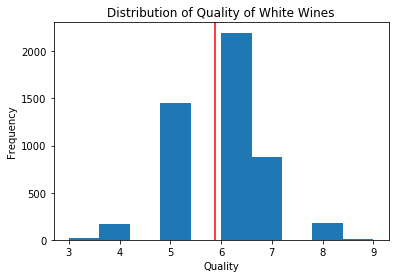

In [12]:
# White wine

plt.figure()
x=df[df['type']=='white']
plt.hist(x['quality'].values)


# Set the title and labels
plt.title('Distribution of Quality of White Wines')
plt.xlabel('Quality')
plt.ylabel('Frequency')
# Plot average line
plt.axvline(x=x['quality'].values.mean(), color='red')


plt.show()

White wines are rated slightly higher than red wines. For this reason and the fact that people have different preferences for white/red wine, I'm going to split the two wines into two datasets and predict quality for white and red wine individually.

In [13]:
df['type'].unique()

array(['red', 'white'], dtype=object)

In [14]:
reds = df[df['type']=='red']
whites = df[df['type']=='white']

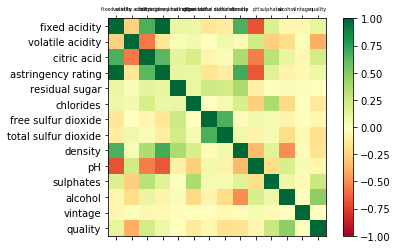

In [15]:
# Create a correlation matrix to see which variables are correlated to one another

# reds
names = list(reds)[1:]
my_cmap = matplotlib.cm.get_cmap('RdYlGn')
correlations = reds.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1,cmap=my_cmap)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, fontsize=5)
ax.set_yticklabels(names)
plt.show()

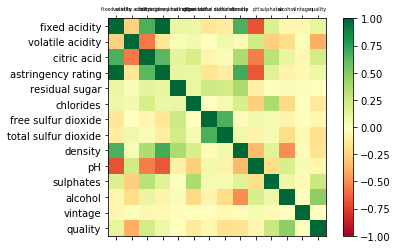

In [16]:
# whites

# reds
names = list(whites)[1:]
my_cmap = matplotlib.cm.get_cmap('RdYlGn')
correlations = reds.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1,cmap=my_cmap)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, fontsize=5)
ax.set_yticklabels(names)
plt.show()

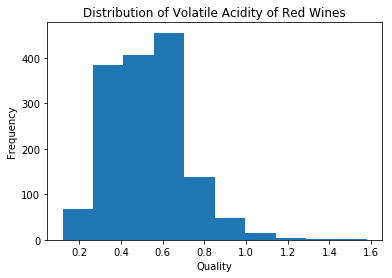

In [17]:
# Distribution of volatile acidity

# Red wine
plt.figure()
A = reds['volatile acidity'].values
plt.hist(A[~np.isnan(A)])


# Set the title and labels
plt.title('Distribution of Volatile Acidity of Red Wines')
plt.xlabel('Quality')
plt.ylabel('Frequency')

plt.show()

It appears that for both red and white wines, volatile acidity and alcohol are two features that are correlated with wine quality.

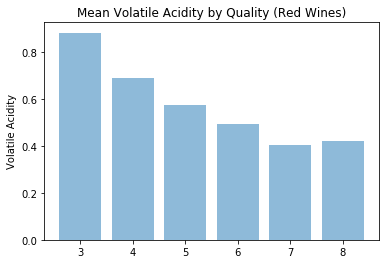

In [18]:
# Let's look at volatile acidity. For each rating, what is the average volatile acidity?

# Reds
x = reds.groupby('quality').mean()['volatile acidity']

objects = x.index.values
y_pos = np.arange(len(objects))
vol_acidity = x.values
 
plt.bar(y_pos, vol_acidity, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Volatile Acidity')
plt.title('Mean Volatile Acidity by Quality (Red Wines)')
 
plt.show()

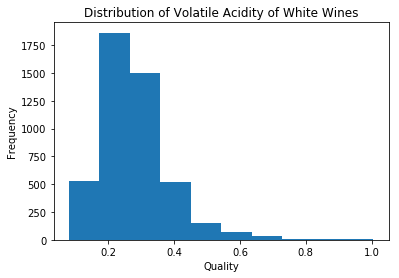

In [19]:
# Whites

plt.figure()
A = whites['volatile acidity'].values
plt.hist(A[~np.isnan(A)])


# Set the title and labels
plt.title('Distribution of Volatile Acidity of White Wines')
plt.xlabel('Quality')
plt.ylabel('Frequency')
# Plot average line
plt.axvline(x=whites['volatile acidity'].values.mean(), color='red')

plt.show()

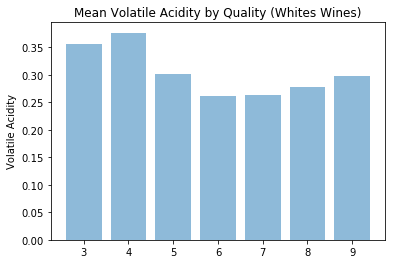

In [20]:
# Whites
x = whites.groupby('quality').mean()['volatile acidity']

objects = x.index.values
y_pos = np.arange(len(objects))
vol_acidity = x.values
 
plt.bar(y_pos, vol_acidity, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Volatile Acidity')
plt.title('Mean Volatile Acidity by Quality (Whites Wines)')
 
plt.show()

It looks like a lower volatile acidity is better for both white and red wines. What about alcohol level?

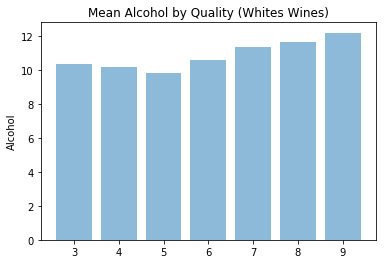

In [21]:
# Whites
x = whites.groupby('quality').mean()['alcohol']

objects = x.index.values
y_pos = np.arange(len(objects))
alcohol = x.values
 
plt.bar(y_pos, alcohol, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Alcohol')
plt.title('Mean Alcohol by Quality (Whites Wines)')
 
plt.show()

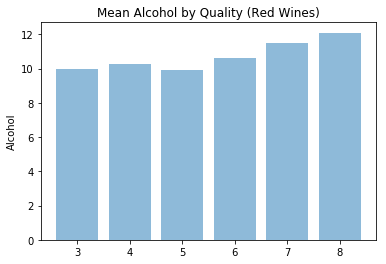

In [22]:
# Reds
x = reds.groupby('quality').mean()['alcohol']

objects = x.index.values
y_pos = np.arange(len(objects))
alcohol = x.values
 
plt.bar(y_pos, alcohol, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Alcohol')
plt.title('Mean Alcohol by Quality (Red Wines)')
 
plt.show()

It looks like higher alcohol percentages are better for high quality wines.

### Data Preprocessing

The year is an interval variable, so I'm going to calculate the the amount of time it has been aging with the assumption that our data was collected in 2018.

In [23]:
df = df.assign(age = lambda x: 2018-df.vintage)

In [24]:
del(df['vintage'])

In [25]:
df.shape

(6497, 15)

In [26]:
# See if there are nan values, since sklearn doesn't take nan values.
df.isnull().sum()

type                       0
fixed acidity              0
volatile acidity         299
citric acid                0
astringency rating       332
residual sugar          2364
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                        62
sulphates                  0
alcohol                    0
quality                    0
age                       69
dtype: int64

In [27]:
2364/6497

0.3638602431891642

In [28]:
# Drop residual sugar column since over 30% is missing.
del(df['residual sugar'])

In [29]:
# see how much of df will be dropped if we drop all nan
df.dropna().shape

(5763, 14)

In [30]:
5763/6497

0.8870247806680006

88% of the data will remain, so let's drop the data. If I were to spend more time on this, I would see if there are any patterns we can see causing these nan values.

In [31]:
df.dropna(inplace=True)
df.shape
# TODO: See if there is a pattern of nans within only one type of wine (e.g. red/white)

(5763, 14)

Now, I'll define what is a "good" quality wine. From the distribution of qualities between red and white wines, it appears that the the average quality is around 5.5 for red wines and 5.8 for white wines. The most frequent rating is 5 for red wines and 6 for white wines. For this reason, I will define a "good" red wine as a wine with at least a quality of 6 and a "good" white wine as a wine with at least a quality of 7. 

In [32]:
reds = df[df['type']=='red']
whites = df[df['type']=='white']

In [33]:
reds['label'] = np.where(reds['quality']>=6, 1, 0)
whites['label'] = np.where(whites['quality']>=7, 1, 0)

/Users/emily/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/emily/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [34]:
# del(reds['quality'])
# del(whites['quality'])

Now that we have our labels, I'm going to use a Random Forest to predict what makes a wine "good" (i.e., above average). I'm using a random forest for a few reasons:
- It's takes very little time to optimize (default parameters are usually already optimal).
- It's strong with continuous and discrete variables. The scales of each feature doesn't affect other features.
- We can easily see feature importance, and I can build a simple decision tree to see how the model is splitting the data.

### Red Wines

In [35]:
# Create training and test sets with a 66% split. 
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

/Users/emily/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
del(reds['type'])
del(whites['type'])
reds.head()

,fixed acidity,volatile acidity,citric acid,astringency rating,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,age,label
0,7.4,0.70,0.00,0.81,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,17.0,0
2,7.8,0.76,0.04,0.85,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,12.0,0
3,11.2,0.28,0.56,1.14,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,15.0,1
4,7.4,0.70,0.00,0.81,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,14.0,0
5,7.4,0.66,0.00,0.80,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,14.0,0


In [37]:
# X_reds = reds.drop(['label','quality'], axis=1).values
# y_reds = reds['label'].values

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_reds,y_reds,test_size=0.33)

msk = np.random.rand(len(reds)) < 0.66
train = reds[msk]
test = reds[~msk]
X_train = train.drop(['label','quality'], axis=1).values
X_test = test.drop(['label','quality'], axis=1).values
y_train = train['label'].values
y_test = test['label'].values
test_quality = test['quality'].values


In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print("test score: ",test_score)
train_score = rf_model.score(X_train, y_train)
print("train score: ",train_score)

test score:  0.811403508772
train score:  0.991675338189


In [39]:
# Let's take a look at how well the model is performing.

# Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = rf_model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[167,  39],
       [ 47, 203]])

It looks like a similar percentage of false negatives and false positives is occurring.

Feature ranking:
10. alcohol (0.178873)
9. sulphates (0.146115)
6. total sulfur dioxide (0.098136)
1. volatile acidity (0.089495)
7. density (0.084966)
5. free sulfur dioxide (0.069289)
4. chlorides (0.068187)
3. astringency rating (0.065134)
8. pH (0.061656)
2. citric acid (0.054002)
0. fixed acidity (0.053238)
11. age (0.030908)


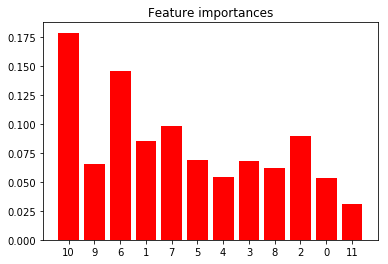

In [40]:
# Print the feature ranking
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([rf_model.feature_importances_ for tree in rf_model.estimators_],
             axis=0)

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (indices[f], list(reds.drop(['label','quality'], axis=1))[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(indices, importances,
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Alcohol seems to be the most important feature. It is given almost double the weight of half of the features. Let's see what happens if we remove that feature. 

In [41]:
X_reds_ = reds.drop(['label','quality','alcohol'], axis=1).values
y_reds_ = reds['label'].values

X_train_, X_test_, y_train_, y_test_ = cross_validation.train_test_split(X_reds_,y_reds_,test_size=0.33)

In [42]:
rf_model_ = RandomForestClassifier()
rf_model_.fit(X_train_, y_train_)
test_score_ = rf_model_.score(X_test_, y_test_)
print("test score: ",test_score_)
train_score_ = rf_model_.score(X_train_, y_train_)
print("train score: ",train_score_)

test score:  0.75
train score:  0.988408851423


In [43]:
# Let's take a look at how well the model is performing.

# Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions_ = rf_model_.predict(X_test_)
confusion_matrix(y_test_, predictions_)

array([[167,  54],
       [ 63, 184]])

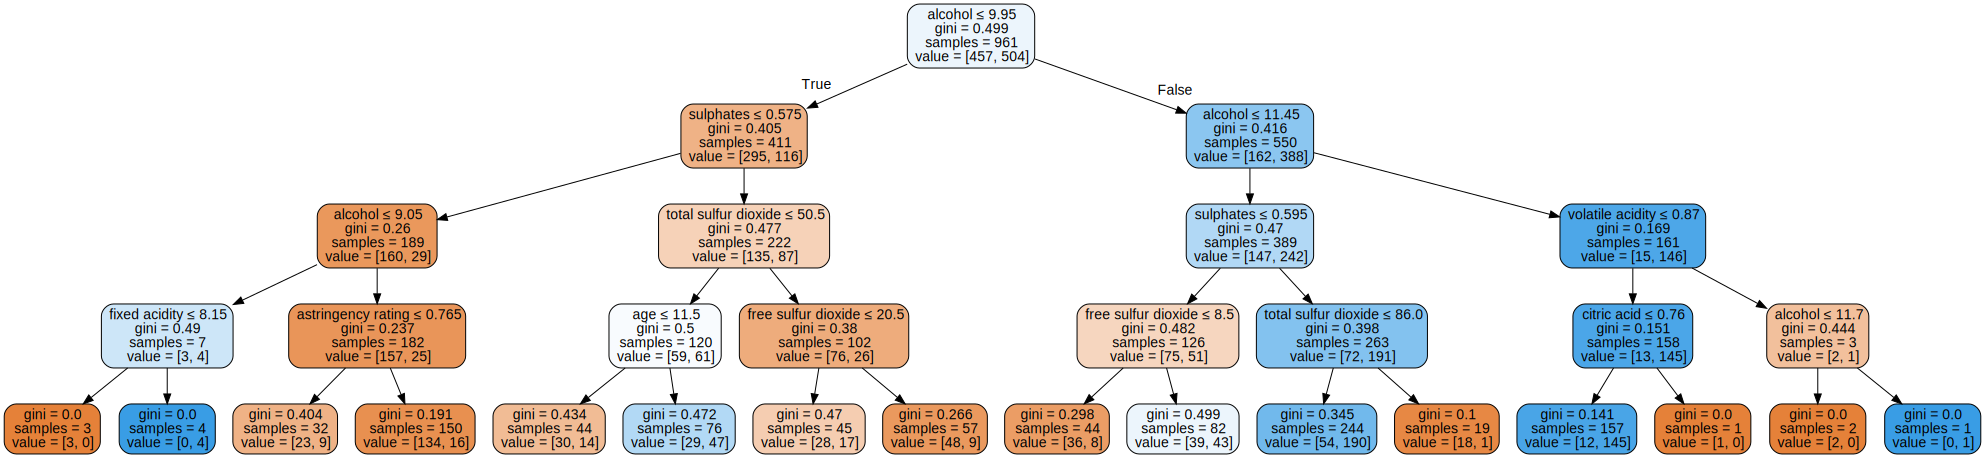

In [44]:
# Fit a single decision tree to see splits
from sklearn import tree
import graphviz

dt = tree.DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(reds.drop(['label','quality'], axis=1)),  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph

The three most important features appear to be alcohol, total sulfur dioxide, and sulphates.

In [45]:
# See what the actual quality is for predictions that are wrong

compare = pd.DataFrame({'quality': test_quality,'predictions': predictions, 'label': y_test})
compare.head()

,label,predictions,quality
0,0,0,5
1,1,0,7
2,0,0,5
3,1,1,7
4,0,0,4


In [46]:
wrong = compare[compare['label']!=compare['predictions']]
wrong.head()

,label,predictions,quality
1,1,0,7
5,1,0,6
11,0,1,4
22,0,1,5
31,1,0,6


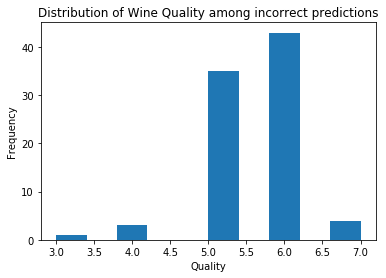

In [47]:
plt.figure()
plt.hist(wrong['quality'])


# Set the title and labels
plt.title('Distribution of Wine Quality among incorrect predictions')
plt.xlabel('Quality')
plt.ylabel('Frequency')

plt.show()

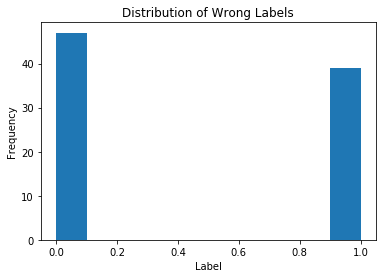

In [48]:
plt.figure()
plt.hist(wrong['predictions'])


# Set the title and labels
plt.title('Distribution of Wrong Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

The majority of the wrong predictions have a quality of 5 or 6. This means that most of the wrong predictions are average quality. If I had more time, I would create more features to see if combinations of features provide more information than the features we have available. 

### Whites

In [49]:
# X_whites = whites.drop(['label','quality'], axis=1).values
# y_whites = whites['label'].values

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_whites,y_whites,test_size=0.33)

msk = np.random.rand(len(whites)) < 0.66
train = whites[msk]
test = whites[~msk]
X_train = train.drop(['label','quality'], axis=1).values
X_test = test.drop(['label','quality'], axis=1).values
y_train = train['label'].values
y_test = test['label'].values
test_quality = test['quality'].values

In [50]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print("test score: ",test_score)
train_score = rf_model.score(X_train, y_train)
print("train score: ",train_score)

test score:  0.860465116279
train score:  0.987170596394


In [51]:
# Let's take a look at how well the model is performing.

# Confusion Matrix
predictions = rf_model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[1108,   48],
       [ 156,  150]])

Feature ranking:
10. alcohol (0.149618)
7. density (0.147169)
4. chlorides (0.094107)
9. sulphates (0.080086)
1. volatile acidity (0.079913)
6. total sulfur dioxide (0.079325)
5. free sulfur dioxide (0.078219)
8. pH (0.078196)
2. citric acid (0.069832)
0. fixed acidity (0.060794)
3. astringency rating (0.056382)
11. age (0.026359)


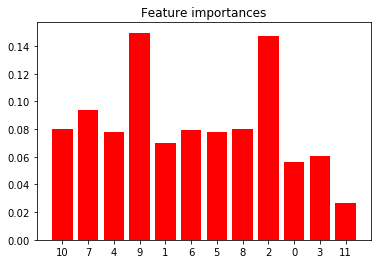

In [52]:
# Print the feature ranking
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([rf_model.feature_importances_ for tree in rf_model.estimators_],
             axis=0)

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (indices[f], list(whites.drop(['label','quality'], axis=1))[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(indices, importances,
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Again, alcohol seems to be the most important feature. It is given almost double the weight of half of the features. Let's see what happens if we remove that feature. 

In [54]:
X_whites_ = whites.drop(['label','quality','alcohol'], axis=1).values
y_whites = whites['label'].values

X_train_, X_test_, y_train_, y_test_ = cross_validation.train_test_split(X_whites_,y_whites,test_size=0.33)

In [56]:
rf_model_ = RandomForestClassifier()
rf_model_.fit(X_train_, y_train_)
test_score_ = rf_model_.score(X_test_, y_test_)
print("test score: ",test_score_)
train_score_ = rf_model_.score(X_train_, y_train_)
print("train score: ",train_score_)

test score:  0.842508710801
train score:  0.99141188595


In [57]:
# Let's take a look at how well the model is performing.

# Confusion Matrix
predictions_ = rf_model_.predict(X_test_)
confusion_matrix(y_test_, predictions_)

array([[1073,   56],
       [ 170,  136]])

Removing alcohol improves accuracy, but increases the rate of false positives to almost the same number of true positives.

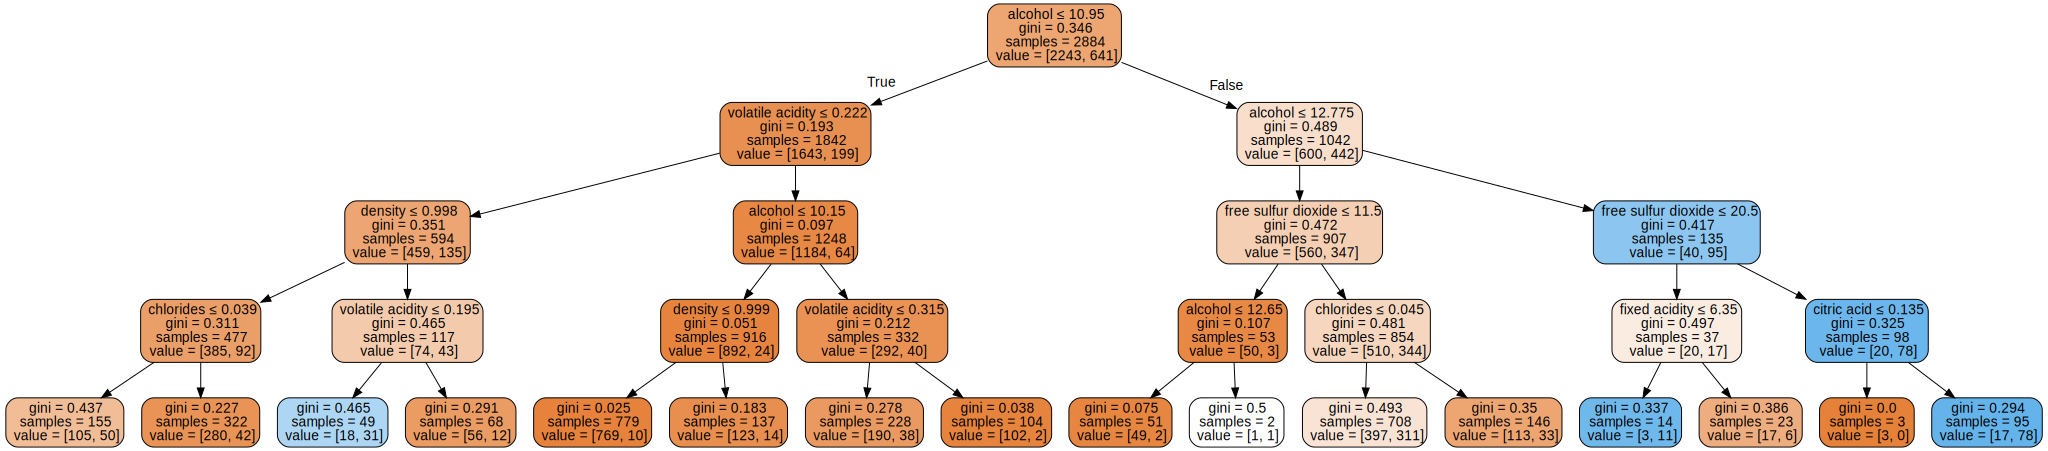

In [58]:
# Fit a single decision tree to see splits

dt = tree.DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(reds.drop(['label','quality'], axis=1)),  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph

In [59]:
# See what the actual quality is for predictions that are wrong

compare = pd.DataFrame({'quality': test_quality,'predictions': predictions, 'label': y_test})
compare.head()

,label,predictions,quality
0,0,0,6
1,0,0,6
2,0,0,6
3,0,0,6
4,0,0,5


In [60]:
wrong = compare[compare['label']!=compare['predictions']]
wrong.head()

,label,predictions,quality
5,1,0,7
7,1,0,7
24,1,0,7
26,1,0,7
35,1,0,7


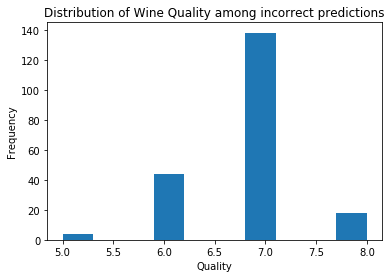

In [61]:
plt.figure()
plt.hist(wrong['quality'])


# Set the title and labels
plt.title('Distribution of Wine Quality among incorrect predictions')
plt.xlabel('Quality')
plt.ylabel('Frequency')

plt.show()

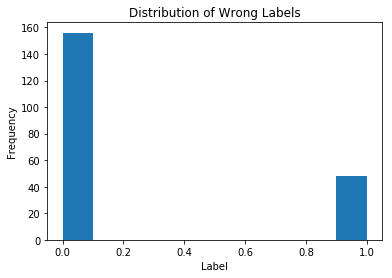

In [62]:
plt.figure()
plt.hist(wrong['predictions'])


# Set the title and labels
plt.title('Distribution of Wrong Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

Most of the wrong predictions are false positives for "good" quality white wines with a rating of 7 (i.e., on the border of "good" and "not good". Again, I would want to find/create more features to see if we could get a cleaner split. Rather than using this model to find "good" quality wines, we would use this model as it is to find "not good" quality wines.

In [79]:
# Tuning Hyperparameters: Our results for white wines is  giving us the inverse of what we want. 
# Ideally, I would use grid search to find the optimal set of hyperparameters.
# For now, let's try increasing the number of estimators (trees) and min samples required for
# a leaf node in our random forest.
# I'll also try dropping the three features that provide the least information.

msk = np.random.rand(len(whites)) < 0.66
train = whites[msk]
test = whites[~msk]
X_train = train.drop(['label','quality','age','fixed acidity','citric acid'], axis=1).values
X_test = test.drop(['label','quality','age','fixed acidity','citric acid'], axis=1).values
y_train = train['label'].values
y_test = test['label'].values
test_quality = test['quality'].values

In [80]:
rf_model2 = RandomForestClassifier(n_estimators=40, min_samples_leaf=50)
rf_model2.fit(X_train, y_train)
test_score = rf_model2.score(X_test, y_test)
print("test score: ",test_score)
train_score = rf_model2.score(X_train, y_train)
print("train score: ",train_score)

test score:  0.805159538357
train score:  0.821092934215


In [81]:
# Let's take a look at how well the model is performing.

# Confusion Matrix
predictions = rf_model2.predict(X_test)
confusion_matrix(y_test, predictions)

array([[1125,   32],
       [ 255,   61]])

### Conclusions

For white wines, the classification model did not improve with the minor changes I tried to make with the model's hyperparameters and features. This could mean a few things:

- The features that I'm currently using aren't sufficient to split the data into "good" and "not good" quality wines.
- The threshold I've chosen for "good" quality white wines (a quality rating of 7 or more) is actually not the right threshold.

As it is now, this model could be used for predicting when a white wine is not of good quality with only 3% of those predictions being untrue.

For red wines, the classification model is useful at predicting whether or not a red wine is "good" or "not good" with only 15% chance of those predictions being false. For a restaurant that depends on wine quality, this is still not sufficient. Again, I feel that feature creation will be useful for improving the model.

For both white and red wines, it appears that alcohol is the number one predictor of its quality. Red wines should have an alcohol reading of at least 9.95 while white wines should have an alcohol reading of at least 10.25 to be considered higher quality. For red wines, sulfates is important, wile for white wines, density is important.